In [1]:
import bag_to_h5_to_measurement
import os
import radkit_lamp as rkl
import mfdf

/home/emil/miniconda3/envs/radkit-dev/lib/python3.9/site-packages/pytools/persistent_dict.py:63: RecommendedHashNotFoundWarning: Unable to import recommended hash 'siphash24.siphash13', falling back to 'hashlib.sha256'. Run 'python3 -m pip install siphash24' to install the recommended hash.
  warn("Unable to import recommended hash 'siphash24.siphash13', "


In [2]:
dugway_data_folder_path = os.path.expanduser("~/data/data/nglamp/2021_10_Dugway/2021_10_06_20_48_48")

In [3]:
bag_files = [os.path.join(dugway_data_folder_path, f) for f in os.listdir(dugway_data_folder_path) if f.endswith(".bag")]
bag_to_h5_to_measurement.folder_to_h5(dugway_data_folder_path)

Found data.bag.h5 file in /home/emil/data/data/nglamp/2021_10_Dugway/2021_10_06_20_48_48


'/home/emil/data/data/nglamp/2021_10_Dugway/2021_10_06_20_48_48/data.bag.h5'

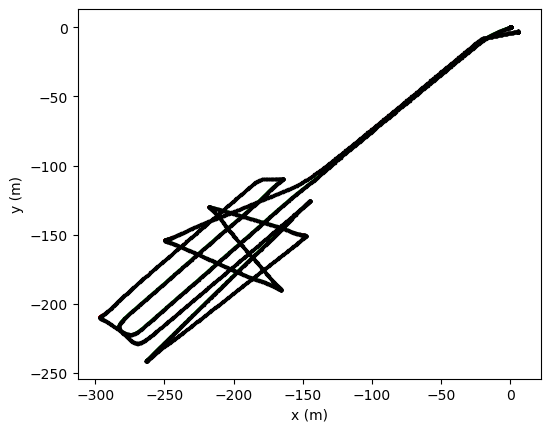

In [4]:
h5_files = [os.path.join(dugway_data_folder_path, f) for f in os.listdir(dugway_data_folder_path) if f.endswith(".h5")]


system = "nglamp_dugway"
recon_config = mfdf.ReconConfigurator(config=rkl.get_recon_config(system))

recon_config.set_param("E", 662.0)
recon_config.set_param("path_padding", 20)
recon_config.set_param("voxel_size", 0.5)

sys_config = mfdf.SystemConfigurator(config_file=rkl.get_system_config(system))

meas = bag_to_h5_to_measurement.h5_to_measurement(h5_files[0], recon_config, sys_config)
meas.traj.plot()


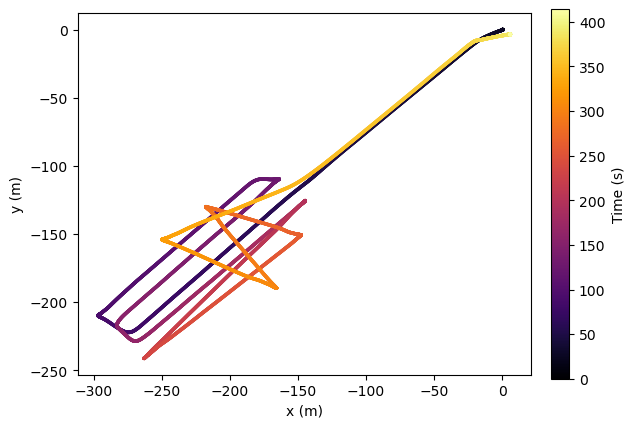

In [5]:
traj_resample = meas.traj.resample(0.05)
traj_resample.plot(
    axes_length=3,
    draw_colorbar=True,
    path_cmap="inferno",
    path_lines=False,
    path_data=traj_resample.ts - traj_resample.ts[0],
    plot_axes=False,
    colorbar_kwargs={"label": "Time (s)"},
)

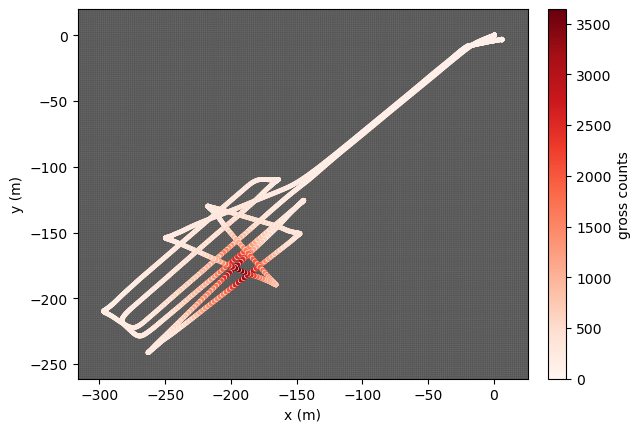

In [6]:
meas.plot(
    plane="xy",
    zmin=None,
    zmax=None,
    plot_traj=True,
    traj_colorize_by="counts",
    traj_kwargs={
        "path_cmap": "Reds",
        "path_lines": False,
        "draw_colorbar": True,
        "s": 25,
    },
)

In [7]:
meas.config

SystemConfigurator:
    config_file: /home/emil/repos/radkit/repos/lamp/radkit_lamp/radkit_lamp/systems/nglamp_dugway/system_config.yaml
    params: 
            det_geometry: det_geometry_NG2.txt
            det_geometry_units: mm
            det_radius: 0.1
            det_to_baselink: [[1.0, 0.0, 0.0, -0.1], [0.0, -1.0, 0.0, 0.0], [0.0, 0.0, -1.0, -0.02], [0.0, 0.0, 0.0, 1.0]]
            name: nglamp
            rad_xyz_units: m
            response:
                gpsl:
                    angular_response: 20191024_NG2_v2_response_smooth.h5
                    angular_response_rotation: [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
                    ch_to_det_map: ch2det_NG2.yaml
                    systematic_uncertainty: 0.2
                occlusion:
                    angular_response: 20191024_NG2_v2_response_smooth.h5
                    angular_response_rotation: [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
                    ch_to_det_map: ch2det_NG2.yaml
                    systematic_unc

<Axes: xlabel='Energy (keV)', ylabel='Unix timestamp (s)'>

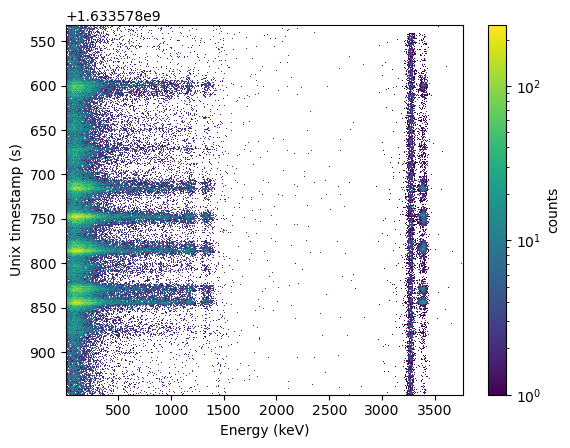

In [17]:
from matplotlib.colors import LogNorm
meas.rad.plot_waterfall(norm=LogNorm())



In [12]:
status = mfdf.tools.status.Status(name="mfdf recon", quiet=True)
recon = mfdf.Reconstruction(measurement=meas, config=recon_config, status=status)
image_gpsl, bkgs_gpsl = recon.compute_gpsl()



/home/emil/repos/radkit/repos/base/mfdf/mfdf/core/measurement.py:746: UserWarning: At least one entry in active_det_ids =
[ 6549  9535 32683 42533 52745]
is not in the channel mapping keys
= dict_keys([6549, 42533, 52745, 58396, 32683])
and will be marked inactive.
  warnings.warn(


AssertionError: 